In [43]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.colors as mcolors


small_size = 10
medium_size = 12
bigger_size = 14

plt.rc('font', size=bigger_size)          # controls default text sizes
plt.rc('axes', titlesize=bigger_size)     # fontsize of the axes title
plt.rc('axes', labelsize=bigger_size)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=bigger_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=bigger_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=bigger_size)    # legend fontsize
plt.rc('figure', titlesize=bigger_size)   # fontsize of the figure title

plt.rcParams["figure.figsize"] = (12,8)   # figure size

import csv
import requests
from datetime import datetime

#plt.style.use('ggplot')

## Covid Quick Analysis

This project consists on a quick view of covid data from around the world. The covid data is updated daily and contains information of every country from the start of the pandemic.
We'll use Panda on Python and Power BI. Additionally, there is a SQL with queries that extract the same information.

### Importing Data

We import data from https://ourworldindata.org/. This file comes with extensive data.

In [5]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
r = requests.get(url, allow_redirects=True)
url_content = r.content
csv_file = open('owid-covid-data.csv', 'wb')
csv_file.write(url_content)
csv_file.close()

In [6]:
df_raw = pd.read_csv (r'owid-covid-data.csv')
df_raw

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121242,ZWE,Africa,Zimbabwe,2021-09-30,130820.0,335.0,240.857,4623.0,7.0,3.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121243,ZWE,Africa,Zimbabwe,2021-10-01,131028.0,208.0,270.571,4624.0,1.0,3.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121244,ZWE,Africa,Zimbabwe,2021-10-02,131094.0,66.0,227.000,4625.0,1.0,3.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121245,ZWE,Africa,Zimbabwe,2021-10-03,131129.0,35.0,214.857,4627.0,2.0,3.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Here df_raw presents columns 'continent' and 'location'. For countries 'continent' isn't null but location can also be a continent or the entire world, in these cases the column 'continent' is null.
df becomes the data base with countries only (without continents and world values).

In [7]:
df = df_raw[df_raw['continent'].notnull()]
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121242,ZWE,Africa,Zimbabwe,2021-09-30,130820.0,335.0,240.857,4623.0,7.0,3.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121243,ZWE,Africa,Zimbabwe,2021-10-01,131028.0,208.0,270.571,4624.0,1.0,3.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121244,ZWE,Africa,Zimbabwe,2021-10-02,131094.0,66.0,227.000,4625.0,1.0,3.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121245,ZWE,Africa,Zimbabwe,2021-10-03,131129.0,35.0,214.857,4627.0,2.0,3.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


### Checking how much data is missing

In [8]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())#False is 0, True is 1
    print('{} - {}%'.format(col, round(pct_missing*100)))

iso_code - 0%
continent - 0%
location - 0%
date - 0%
total_cases - 5%
new_cases - 5%
new_cases_smoothed - 6%
total_deaths - 14%
new_deaths - 14%
new_deaths_smoothed - 6%
total_cases_per_million - 5%
new_cases_per_million - 5%
new_cases_smoothed_per_million - 6%
total_deaths_per_million - 14%
new_deaths_per_million - 14%
new_deaths_smoothed_per_million - 6%
reproduction_rate - 16%
icu_patients - 88%
icu_patients_per_million - 88%
hosp_patients - 86%
hosp_patients_per_million - 86%
weekly_icu_admissions - 99%
weekly_icu_admissions_per_million - 99%
weekly_hosp_admissions - 98%
weekly_hosp_admissions_per_million - 98%
new_tests - 55%
total_tests - 55%
total_tests_per_thousand - 55%
new_tests_per_thousand - 55%
new_tests_smoothed - 46%
new_tests_smoothed_per_thousand - 46%
positive_rate - 49%
tests_per_case - 50%
tests_units - 44%
total_vaccinations - 78%
people_vaccinated - 79%
people_fully_vaccinated - 82%
total_boosters - 98%
new_vaccinations - 82%
new_vaccinations_smoothed - 59%
total_

### Current  Death Rate in % per Country

In [6]:
death_rate=(df.groupby(['location'])['total_deaths'].max()/df.groupby(['location'])['total_cases'].max())*100
death_rate.sort_values(ascending=False)

location
Vanuatu                     25.000000
Yemen                       18.973338
Peru                         9.165014
Sudan                        7.585305
Mexico                       7.577102
                              ...    
Turkmenistan                      NaN
Turks and Caicos Islands          NaN
Tuvalu                            NaN
Vatican                           NaN
Wallis and Futuna                 NaN
Length: 224, dtype: float64

### Current Cases per Country

In [7]:
highest_infection_count = df.groupby(['location'])['total_cases'].max()
highest_infection_count

location
Afghanistan          155128.0
Albania              169462.0
Algeria              203198.0
Andorra               15209.0
Angola                56583.0
                       ...   
Vietnam              779398.0
Wallis and Futuna         NaN
Yemen                  9039.0
Zambia               209002.0
Zimbabwe             130485.0
Name: total_cases, Length: 224, dtype: float64

### Infection Rate Percentage  per Country

In [8]:
infection_rate=(df.groupby(['location'])['total_cases'].max()/df.groupby(['location'])['population'].max())*100
infection_rate
infection_rate.sort_values(ascending=False)

location
Seychelles                  21.709635
Montenegro                  20.861363
Andorra                     19.661556
San Marino                  15.989415
Czechia                     15.765300
                              ...    
Tonga                             NaN
Turkmenistan                      NaN
Turks and Caicos Islands          NaN
Tuvalu                            NaN
Wallis and Futuna                 NaN
Length: 224, dtype: float64

### Highest Death Count per County

In [9]:
highest_death_count = df.groupby(['location'])['total_deaths'].max()
highest_death_count.sort_values(ascending=False)

location
United States               695114.0
Brazil                      596122.0
India                       448062.0
Mexico                      276973.0
Russia                      202700.0
                              ...   
Turkmenistan                     NaN
Turks and Caicos Islands         NaN
Tuvalu                           NaN
Vatican                          NaN
Wallis and Futuna                NaN
Name: total_deaths, Length: 224, dtype: float64

### Death Rate Percentage per Country

In [10]:
death_rate=(highest_death_count/highest_infection_count)*100
death_rate.sort_values(ascending=False)

location
Vanuatu                     25.000000
Yemen                       18.973338
Peru                         9.165014
Sudan                        7.585305
Mexico                       7.577102
                              ...    
Turkmenistan                      NaN
Turks and Caicos Islands          NaN
Tuvalu                            NaN
Vatican                           NaN
Wallis and Futuna                 NaN
Length: 224, dtype: float64

### Database with continents only

dc now becomes the database for continents and wold.

In [10]:
dc = df_raw[df_raw['continent'].isnull()]
dc

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
589,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
591,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119569,OWID_WRL,NaN,World,2021-09-30,233771488.0,485039.0,452097.143,4783505.0,8769.0,7718.714,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
119570,OWID_WRL,NaN,World,2021-10-01,234315923.0,544435.0,451616.714,4792089.0,8584.0,7681.143,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
119571,OWID_WRL,NaN,World,2021-10-02,234657580.0,341657.0,448497.143,4797823.0,5734.0,7742.286,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
119572,OWID_WRL,NaN,World,2021-10-03,234949628.0,292048.0,442934.429,4801822.0,3999.0,7577.143,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


### Infection Rate per continent 

In [11]:
((dc.groupby(['location'])['total_cases'].max()/dc.groupby(['location'])['population'].max())*100).sort_values(ascending=False)

location
North America     8.840781
South America     8.715772
European Union    8.520987
Europe            8.014757
World             2.989322
Asia              1.631480
Africa            0.607545
Oceania           0.445405
International          NaN
dtype: float64

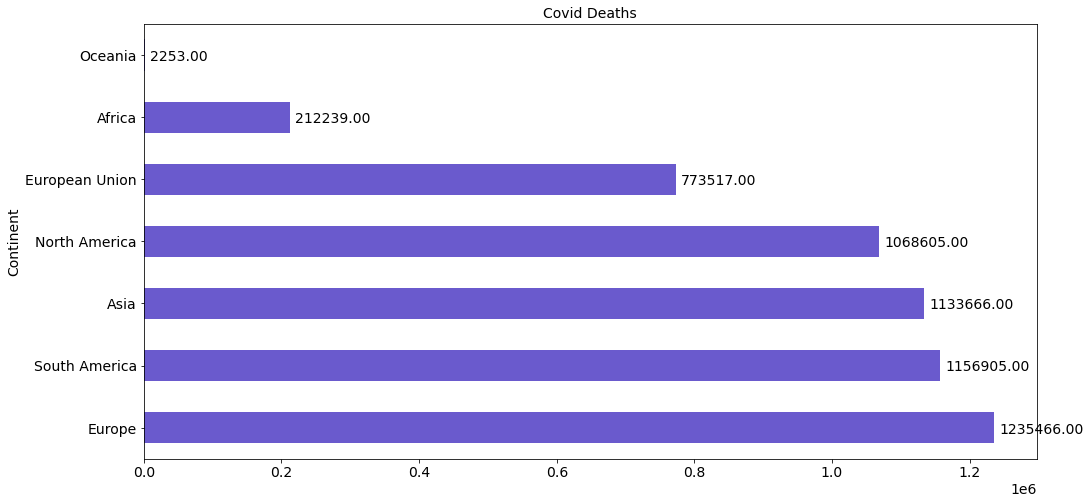

In [12]:
ax = dc.groupby(['location'])['total_deaths'].max().sort_values(ascending=False).drop(labels=['World','International']).plot.barh(xlabel='Continent',ylabel='Deaths', title= 'Covid Deaths', color = 'slateblue' )
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

<AxesSubplot:ylabel='Covid Cases'>

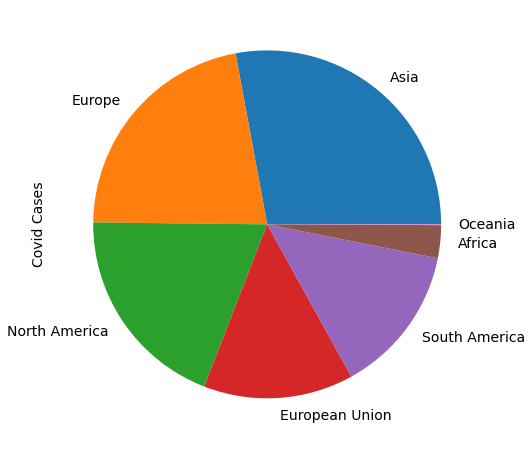

In [13]:
dc.groupby(['location'])['total_cases'].max().sort_values(ascending=False).drop(labels=['World', 'International']).plot.pie( ylabel='Covid Cases')


In [32]:
europe_d =dc.loc[dc['location'] == 'Europe', ['total_cases','total_deaths','date']]
europe_d

,total_cases,total_deaths,date
36433,NaN,NaN,2020-01-23
36434,2.0,NaN,2020-01-24
36435,3.0,NaN,2020-01-25
36436,3.0,NaN,2020-01-26
36437,4.0,NaN,2020-01-27
...,...,...,...
37049,59435878.0,1228213.0,2021-09-30
37050,59577382.0,1230191.0,2021-10-01
37051,59699891.0,1231934.0,2021-10-02
37052,59809643.0,1233484.0,2021-10-03


In [33]:
europe_d['death_rate']=(europe_d['total_deaths']/europe_d['total_cases'])*100

In [49]:
world_d =dc.loc[dc['location'] == 'World', ['total_cases','population','total_deaths','date','people_vaccinated','people_fully_vaccinated']]
world_d['death_rate']=(world_d['total_deaths']/world_d['total_cases'])*100
world_d['vaccination_rate']=(world_d['people_fully_vaccinated']/world_d['population'])*100

<AxesSubplot:xlabel='date'>

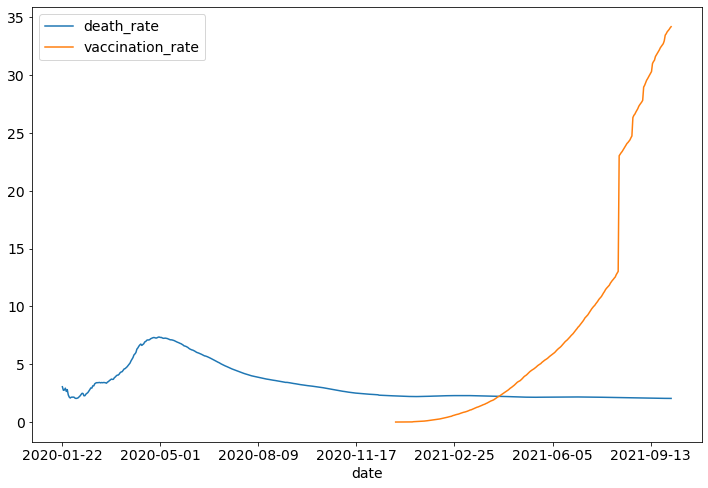

In [50]:
world_d.plot.line(x='date',y=['death_rate','vaccination_rate'])

### Let's visualize on Power BI!

Saving files in excel with world and Portuguese data to visualize on Power BI.

In [24]:
portugal= df.loc[df['location'] == 'Portugal', ['total_deaths', 'date', 'new_cases', 'total_cases' ,'new_deaths', 'people_vaccinated', 'people_fully_vaccinated','icu_patients']]
portugal.fillna(0).set_index('date').to_excel('portugal_info.xlsx', encoding='UTF8')

In [16]:
north_america = dc.loc[dc['location'] == 'North America', ['total_deaths', 'date', 'new_cases', 'total_cases' ,'new_deaths', 'people_vaccinated', 'people_fully_vaccinated','icu_patients']]
north_america.fillna(0).set_index('date').to_excel('north_america.xlsx', encoding='UTF8')

In [17]:
asia= dc.loc[dc['location'] == 'Asia', ['total_deaths', 'date', 'new_cases', 'total_cases' ,'new_deaths', 'people_vaccinated', 'people_fully_vaccinated','icu_patients']]
asia.fillna(0).set_index('date').to_excel('asia.xlsx', encoding='UTF8')

In [18]:
europe=dc.loc[dc['location'] == 'World', ['total_deaths', 'date', 'new_cases', 'total_cases' ,'new_deaths', 'people_vaccinated', 'people_fully_vaccinated']]
europe.fillna(0).set_index('date').to_excel('europe.xlsx', encoding='UTF8')

In [19]:
world = dc.loc[dc['location'] == 'World', ['total_deaths', 'date', 'new_cases', 'total_cases' ,'new_deaths', 'people_vaccinated', 'people_fully_vaccinated']]
world.fillna(0).set_index('date').to_excel('world.xlsx', encoding='UTF8')

In [20]:
case_count = df.groupby(['location'])['total_cases'].max()
case_count.to_excel('cases.xlsx', encoding='UTF8')

In [21]:
death_count = df.groupby(['location'])['total_deaths'].max()
death_count.to_excel('death_world.xlsx', encoding='UTF8')

In [22]:
infection_rate=(df.groupby(['location'])['total_cases'].max()/df.groupby(['location'])['population'].max())*100
infection_rate.to_excel('infection_world.xlsx', encoding='UTF8')